In [1]:
# Multiclass Logistic Regression Model


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'ticks', color_codes= True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer 
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_excel('ctg.xls',sheetname = 'Raw Data')

In [8]:
data.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 40 columns):
FileName    2126 non-null object
Date        2126 non-null datetime64[ns]
SegFile     2126 non-null object
b           2126 non-null float64
e           2126 non-null float64
LBE         2126 non-null float64
LB          2126 non-null float64
AC          2126 non-null float64
FM          2127 non-null float64
UC          2127 non-null float64
ASTV        2127 non-null float64
MSTV        2127 non-null float64
ALTV        2127 non-null float64
MLTV        2127 non-null float64
DL          2128 non-null float64
DS          2128 non-null float64
DP          2128 non-null float64
DR          2128 non-null float64
Width       2126 non-null float64
Min         2126 non-null float64
Max         2126 non-null float64
Nmax        2126 non-null float64
Nzeros      2126 non-null float64
Mode        2126 non-null float64
Mean        2126 non-null float64
Median      2126 non-null float64
Vari

In [10]:
data.shape

(2130, 40)

In [14]:
data_1 = data.drop(columns =['FileName','SegFile','Date'])

In [15]:
data_1.shape

(2130, 37)

In [17]:
finaldata = data_1.dropna()

In [19]:
finaldata.shape

(2126, 37)

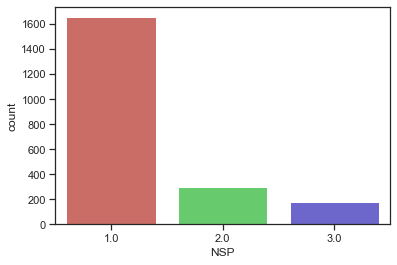

In [21]:
sns.countplot(x='NSP',data=finaldata,palette = 'hls')
plt.show()

In [22]:
x = finaldata[['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV','DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax','Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS']]
y = finaldata['NSP']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [27]:
logreg = LogisticRegression()

In [28]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_prediction = logreg.predict(x_test)

In [32]:
confusion_matrix = metrics.confusion_matrix(y_test, y_prediction)

In [33]:
confusion_matrix

array([[407,   2,   1],
       [  9,  63,   0],
       [  0,   0,  50]], dtype=int64)

Text(0.5, 12.5, 'predicted')

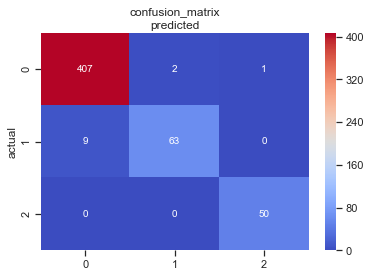

In [36]:
class_names = [1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix),annot= True, cmap='coolwarm',fmt='g' )
ax.xaxis.set_label_position('top')
#plt.tight.layout()
plt.title('confusion_matrix',y=1.1)
plt.ylabel('actual')
plt.xlabel('predicted')

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test,y_prediction))

Accuracy: 0.9774436090225563


In [44]:
def multiclass_roc_auc_score(y_test,y_prediction, average = "macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_prediction = lb.transform(y_prediction)
    return roc_auc_score(y_test, y_prediction, average=average)
auc = multiclass_roc_auc_score(y_test,y_prediction, average = 'macro')
print('Área under curve:',auc)

Área under curve: 0.9645816533570587
